In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [20]:
All_Lost = 0
BasicOptOfferPrice = 35
BasicOptOfferVol = 50
BasicStore = 80
InitAccount = 10000
Max_Demand = 40
MeanDPrice = 100
OptOfferAcceptDecision = 1
OptOfferBaseVolume = 40
RentRate = 200
Ret_Price = 70
ShopStore = 30
STOP_SELL = 0
TransferDecision = 1
TransferRate = 150
TransferVol = 100
Weekends = 2
Qualification = 20
dt = 1
t = 0

In [21]:
Account = InitAccount
BasicPriceRnd = BasicOptOfferVol * (np.random.uniform(.7, 1.3))
AddPriceByTime = BasicOptOfferPrice * 0.03 * t + BasicOptOfferPrice * 0.01 * t * np.random.uniform(0, 1)
OfferOnePrice = AddPriceByTime + BasicPriceRnd
RndOfferVolume = round(OptOfferBaseVolume * np.random.uniform(0.75, 1.25))
OfferFullPrice = OfferOnePrice * RndOfferVolume
OfferAcceptPossibility = 1 if Account >= OfferFullPrice else 0
SmallOptIncom = OfferAcceptPossibility * OptOfferAcceptDecision * RndOfferVolume

TransferActualVolue = min(BasicStore, TransferVol * TransferDecision) if Account >= TransferRate else 0
GoodsTransfer = np.floor(TransferActualVolue)
Lost = ShopStore + GoodsTransfer - 100 if ShopStore + GoodsTransfer > 100 else 0

Demand = round(Max_Demand * ((1 - 1 / (1 + np.exp(-0.05 * (Ret_Price - MeanDPrice)) ))))
# + np.exp(1 - (Qualification/100) + Weekends/7)
RND_Demand = round(Demand * np.random.uniform(0.9, 1.2) + Demand * np.random.uniform(0.05, 0.3) * (Qualification/100 + (Weekends/7)))
SoldRet = (1 - STOP_SELL) * min(RND_Demand, ShopStore)
Selling = SoldRet
Income = Ret_Price * SoldRet
DailySpending = min(RentRate, Account)
TransSpend = TransferRate if TransferActualVolue > 0 else 0
VAT = 0.13 * Income

change_ind = True if input("Do u want to change parameters during modeling? Y/N").lower() == 'y' else False

In [22]:
lost_arr = [All_Lost]
shop_store_data = [ShopStore]
basic_store_data = [BasicStore]
demand_arr = [Demand]
income_arr = [Income]

for t in range(1, 200):
    if change_ind:
        change_ind_iter = True if input("Do u want to change parameters during modeling? Y/N").lower() == 'y' else False
        if change_ind_iter:
            TransferVol = float(input(f"Write TransferVolume"))
            Ret_Price = float(input(f"Write Ret_Price"))
         
    Account += dt * (Income - DailySpending - TransSpend - VAT)
    BasicStore += dt * (SmallOptIncom - GoodsTransfer)
    ShopStore += dt * (GoodsTransfer - Selling - Lost)
    All_Lost += dt * Lost
    lost_arr.append(All_Lost)
    
    BasicPriceRnd = BasicOptOfferVol * (np.random.uniform(.7, 1.3))
    AddPriceByTime = BasicOptOfferPrice * 0.03 * t + BasicOptOfferPrice * 0.01 * t * np.random.uniform(0, 1)
    OfferOnePrice = AddPriceByTime + BasicPriceRnd
    RndOfferVolume = round(OptOfferBaseVolume * np.random.uniform(0.75, 1.25))
    OfferFullPrice = OfferOnePrice * RndOfferVolume
    OfferAcceptPossibility = 1 if Account >= OfferFullPrice else 0
    SmallOptIncom = OfferAcceptPossibility * OptOfferAcceptDecision * RndOfferVolume

    TransferActualVolue = min(BasicStore, TransferVol * TransferDecision) if Account >= TransferRate else 0
    GoodsTransfer = np.floor(TransferActualVolue)
    Lost = ShopStore + GoodsTransfer - 100 if ShopStore + GoodsTransfer > 100 else 0

    Demand = round(Max_Demand * (1 - 1 / (1 + np.exp(-0.05 * (Ret_Price - MeanDPrice)) )))
    # + np.exp(1 - (Qualification/100) + Weekends/7)
    RND_Demand = round(Demand * np.random.uniform(0.9, 1.2) + Demand * np.random.uniform(0.05, 0.3) * (Qualification/100 + (Weekends/7)))
    demand_arr.append(RND_Demand)
    SoldRet = (1 - STOP_SELL) * min(RND_Demand, ShopStore)
    Selling = SoldRet
    Income = Ret_Price * SoldRet
    DailySpending = min(RentRate, Account)
    TransSpend = TransferRate if TransferActualVolue > 0 else 0
    VAT = 0.13*Income
    
    income_arr.append(Income)
    shop_store_data.append(ShopStore)
    basic_store_data.append(BasicStore)

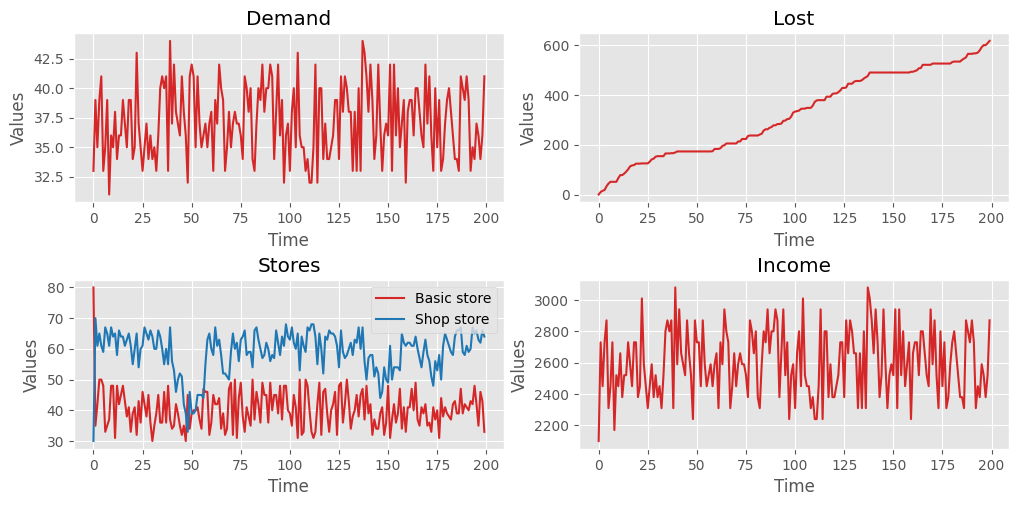

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5), dpi=100)


axs[0, 0].plot(demand_arr, color='tab:red')
axs[0, 0].set_title('Demand')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Values')


axs[0, 1].plot(lost_arr, color='tab:red')
axs[0, 1].set_title('Lost')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Values')


axs[1, 0].plot(basic_store_data, label='Basic store', color='tab:red')
axs[1, 0].plot(shop_store_data, label='Shop store', color='tab:blue')

axs[1, 0].set_title('Stores')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Values')
axs[1, 0].legend()


axs[1, 1].plot(income_arr, color='tab:red')
axs[1, 1].set_title('Income')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Values')


plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.tight_layout(pad=0.5)
plt.show()